# Assignment 4 : MovieLens Recommendation System

### Introduction

MovieLens Recommendation System

http://grouplens.org/datasets/movielens/

Using the MovieLens 1M dataset, and using only the rankings, implement a recommendation sytem using SGD.

import pandas as pd

rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames)

The output of your program must be the highest estimated rankings for the first 10 movies of the first 20 users

Modify the program for mini batch and classical gradient descent.

Compare the running times and solution quality as a function of the batch size. SGD is when batchsize = 1, Gradient descent is batchsize = Number of observed entries in the matrix.

Submit a short report with the plots of your results.

** Name : ** Talat Aydın Çıkıkcı

In [107]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import movie data
rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] 
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [108]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [109]:
Ys = np.mat(ratings)
Ysize = Ys.shape[0]
print Ysize

1000209


In [110]:
# Number of unique user and movie id's in the dataset
uqUsers=len(ratings.user_id.unique())
uqMovies=len(ratings.movie_id.unique())

print 'Unique user IDs: ', uqUsers
print 'Unique movie IDs: ', uqMovies

# Max value of user and movie is's
maxUsers = np.max(Ys[:,0])
maxMovies = np.max(Ys[:,1])

print 'Max user_id value: ', maxUsers
print 'Max movie_id value: ', maxMovies

Unique user IDs:  6040
Unique movie IDs:  3706
Max user_id value:  6040
Max movie_id value:  3952


In [111]:
# Randomized matrices with dimensions of #ofUser:1 and 1:#ofMovies
A = np.mat(np.random.rand(maxUsers+1, 1))
B = np.mat(np.random.rand(1, maxMovies+1))

# Mask matrix that has "1" for an existing value and "0" for a nonexisting value.
M = np.zeros((maxUsers+1, maxMovies+1))
# Y matrix contains the actual rating values for existing user-movie rating pairs.
Y = np.zeros((maxUsers+1, maxMovies+1))

for i in range(Ysize):
    M[Ys[i,0], Ys[i,1]] = 1
    Y[Ys[i,0], Ys[i,1]] = Ys[i, 2]



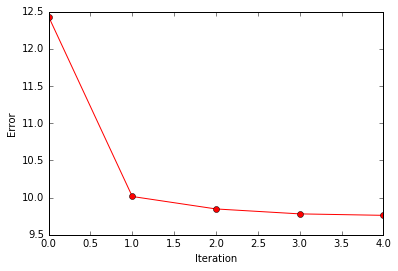

In [112]:
EPOCH = 5
Eta = 0.1
eta = Eta
subsetSize = 10000

errorArr = []

for i in range(EPOCH):
    
    # Get error
    E = np.multiply(M, np.subtract(Y, A*B))
    Err = np.sum(np.square(E)) / np.sum(M)
    errorArr.append(Err)
    
    for k in range(subsetSize):
        
        u = Ys[k,0]
        m = Ys[k,1]
        
        # Find error
        err = Ys[k,2] - (A[u,:] * B[:,m])

        # Compansate for error
        temp_A = A[u,:] + (eta * err[0,0] * B[:,m].T)
        B[:,m]   = B[:,m] + (eta * err[0,0] * A[u,:].T)
        A[u,:]   = temp_A

    eta = Eta * 1./(i+1)
    
plt.plot(list(range(EPOCH)), errorArr, 'ro-')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [114]:
Yr = A * B
for j in range(20):
    
    movieRating = [(0,0)]
    
    for m in range (maxMovies):
        movies = (Yr[j, m], m)
        movieRating.append(movies)
        
    movieRating = sorted(movieRating, key=lambda tup: tup[0], reverse=True)     
    
    print("Sorted approximation of ratings for User: ", j+1)
    for n in range(10):
        print (movieRating[n])

('Sorted approximation of ratings for User: ', 1)
(0.51657024727116807, 3163)
(0.51094559762511871, 949)
(0.50985966679323047, 499)
(0.50514034183653611, 1192)
(0.50469375332406274, 289)
(0.50456983518232001, 905)
(0.50402291059772009, 824)
(0.50079688922298315, 511)
(0.49702810100148093, 3028)
(0.49359152748831897, 2670)
('Sorted approximation of ratings for User: ', 2)
(5.6782989308500715, 3163)
(5.6164710531504056, 949)
(5.6045341676749798, 499)
(5.5526578972209748, 1192)
(5.5477488590285828, 289)
(5.5463867127271111, 905)
(5.5403747495906446, 824)
(5.5049133310907665, 511)
(5.4634856525866224, 3028)
(5.4257097802659473, 2670)
('Sorted approximation of ratings for User: ', 3)
(5.3511631897946188, 3163)
(5.2928973134681598, 949)
(5.2816481307578487, 499)
(5.2327605339162817, 1192)
(5.2281343131427143, 289)
(5.2268506422341696, 905)
(5.2211850377589499, 824)
(5.1877666074076547, 511)
(5.1487256426839405, 3028)
(5.1131260978402322, 2670)
('Sorted approximation of ratings for User: ', 4